<a href="https://colab.research.google.com/github/benmaors/CS231-Deep-Learning/blob/main/Deep%20Learning%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI algorithms summary for Interviews

K nearest neighbours: 
* memorise all data set
* calculate distance of test image to all other images 
* prediction will be the closest image label 

L1 distance: 

$d_1(I_1,I_2) = \Sigma_{pixels}|I_1^p - I_2^p| $

calculate for each pixel: (test image - training image), than sum all pixel differences calculated.

L2 distance(Euclidean):

$d_1(I_1,I_2) = \sqrt{\Sigma_{pixels}(I_1^p - I_2^p)^2} $


** distance matric and K are hyperparameters


#### 1. KNN 

Supervised learning algorithm used for both regression and classification. https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

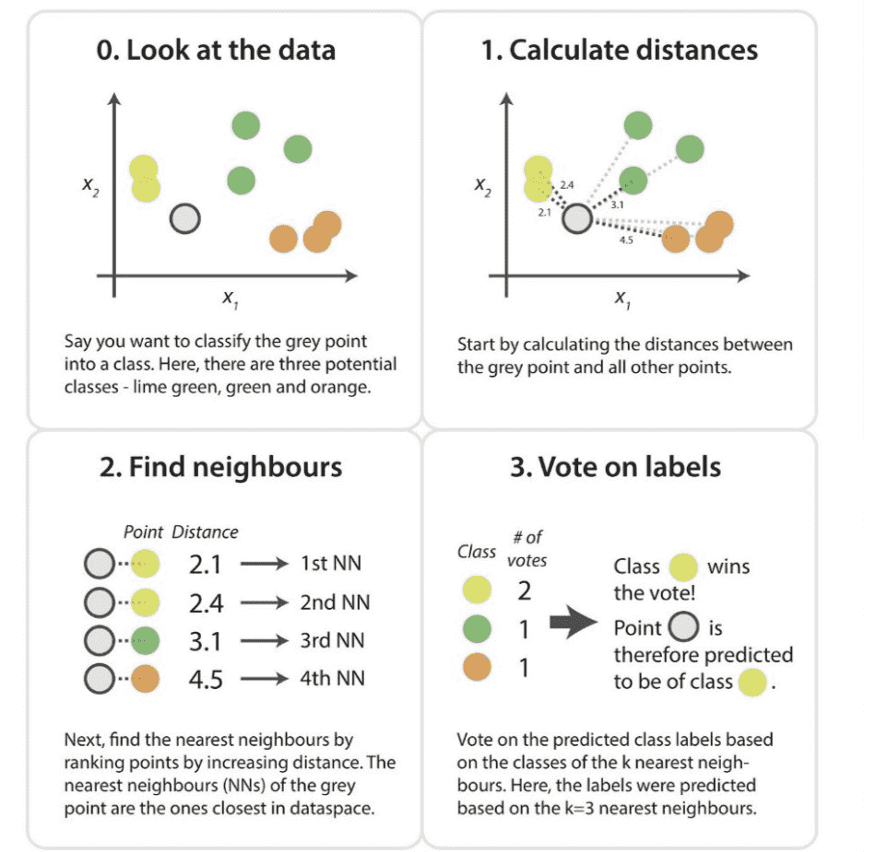

It is a non-parametric algorithm, it doesnt have to learn anything to be able to predict 

1) Find K closest neighbours

    * Euclidean distance
    * Cosine similarity

    regression - we will take the average
    classification - we will take the majority vote

Steps: \
1) obtaining the data\
2) querying (ask) the nearest nieghbors





K is a hyper-parameter predetermind by the user 

* simple approach -> k = sqrt(no.data points)
* cross validation -> 
  - shuffle the training data 
  - divide it to N subdata batches 
  - keep one of them for validation and check the validation error for different K's 
  - then we select the one with the minimum error (הברך של הגרף)#
  - everytime different sub batch can be the validation set



In [ ]:
class KNN:

  def _init_(self):
    # declare instance variables
    self.x = None   # training data
    self.y = None   # labels

  def train(self,X,Y):
    self.x = X
    self.y = Y

  def predict(self,x,k):
    # we calculate the distance to all points, then sort the distances
    distance_label = [self.distance((x,train_point), train_label) for train_point, train_label in zip(self.x, self.y)]
    # after sorting we select the top k neighbors
    neighbors = sorted(distance_label)[:k]

# \\ if it s a classification problem we vote 

#    neighbors_labels = [label for dist,label in neighbors]
#    return Counter(neighbors_labels).most_common()[0][0]

    return sum(label for _,label in neighbors)/k

In [ ]:
# from stanford lecture

class NearestNeighbours():

def _init_(self):
  pass

def train(self,X,Y):
  #simply remembering all the data
  self.x = X
  self.y = Y

def predict(self,X):
  num_test = X.shape[0]
  Ypred = np.zeros(num_test, dtype = self.y.dtype)

  for i in range(num_test):
    distances = np.sum(np.abs(self.x - X[i,:]), axis=1)
    min_index = np.argmin(distances)
    Ypred(i) = self.y[min_index] # predict the label of the nearest example

  return Y_pred 

#### 2) Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data.

**Simple Linear Regression**

Y = Wx + b

(x = independant variable)

* Correlation\
  When an increase in the input variable X is observed with a simultaneous increase or decrease in output variable Y, there’s said to be a correlation between the two. This is a measure of how strongly X and Y relate to each other.

  Linear Regression will help us determine the strength of this relationship 

#### MSE (Mean Square Error)

$Error = \frac{\Sigma(y_i -Y_i)^2}{N}$ (y - observed , Y- predicted) 

we get an optimization problem, we need to find W and b that minimizes the Error (Ordinary Least Squares) 

we will use gradient Descent to find the optimal solution:

* Random initial guess of W,b
* Computr MSE
* Calculate Gradient Descent and update W,b
  * Gradient: derivative of the error with respect to a specific parameter

    $gradient_W = \frac{dE}{dW}$

* repeat until converegence





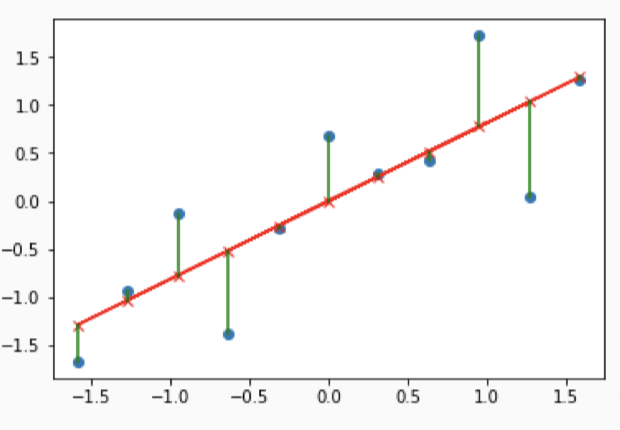

#### Gradient Descent 

Gradient descent is a method of changing weights based on the loss function for each data point. We calculate the sum of squared errors at each input-output data point. We take a partial derivative of the weight and bias to get the slope of the cost function at each point.




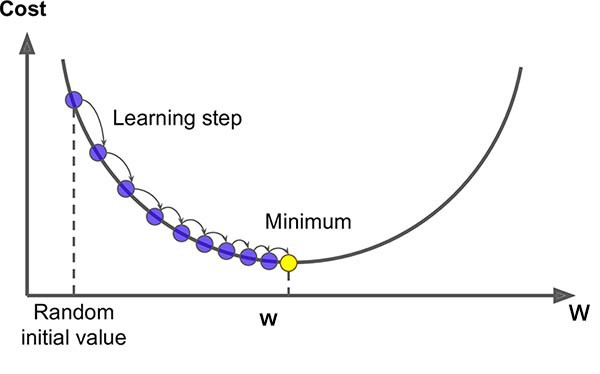

In [ ]:
def linear_regression(x, y, iterations =100, learning_raet = 0.01):

  n,m = len(x[0]), len(x)  # n = number of features ; m = number of points 
  beta_0 , beta_other = initialize_paramters(n)   # the number of betas is as the number of features

  for _ in range(iterations):
    gradient_beta_0, gradient_beta_other = compute_gradient(x, y, beta_0, beta_other, n, m)
    beta_0 , beta_other = update_parametes(beta_0 , beta_other, gradient_beta_0, gradient_beta_other, learning_rate)

    return beta_0 , beta_other

#===============================================================

def initialize_parameters(dimensions):

  beta_0 = 0
  beta_other = [random.random() for _ in range(dimensions)]

  return beta_0, beta_other

#===============================================================

def compute_gradient( x, y, beta_0, beta_other, dimension, m)

  gradient_beta_0 = 0
  gradient_beta_other = [0]*dimension
   
  # Calculate gradient for each point
  for i in range(m):
    
    yi_hat = (sum(x[i][j]*beta_other[j]) for j in range(dimension)) + beta_0
    derror_dy = 2* (y[i] - yi_hat)
    
    for j in range(dimension):

      gradient_beta_other += derror_dy * x[i][j] / dmension
      gradient_beta_0 = derror_dy / dimension

  return gradient_beta_0 , gradient_beta_other

#===============================================================

def update_parameters(beta_0 , beta_other, gradient_beta_0, gradient_beta_other, learning_rate)

  beta_0 += gradient_beta_0 * learning_rate
  for i in range(dimension)
    beta_other[i] += (gradient_beta_other[i] * learning_rate)  # note : the sign (- or +) of adding or substructing the gradient, depends on how we calculate derror_dy 
                                                               # since (y[i] - yi-hat): real_label - predicted , it means that if yi_hat is overestimated, the error is negative, meaning gradient_beta_other will be negative
                                                               # it eads us to add the calculated negative gradient to reduce the predicted value (beta = beta + negative_gradient)
    return beta_other, beta_0

###### Learning Rate

too high - unstable\
too low - will not converrge

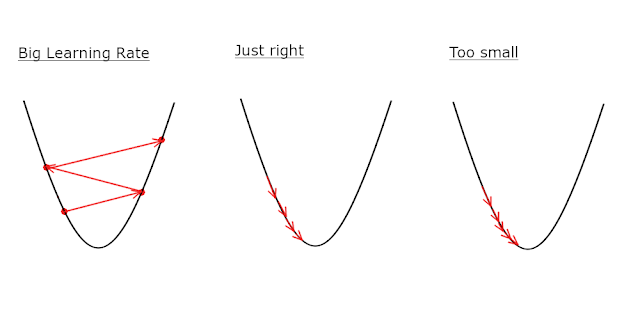

#### L1 & L2 Regularization

Now, there are few ways you can avoid overfitting your model on training data like cross-validation sampling, reducing number of features, pruning, regularization etc.
Regularization basically adds the penalty as model complexity increases. Regularization parameter (lambda) penalizes all the parameters except intercept so that model generalizes the data and won’t overfit.



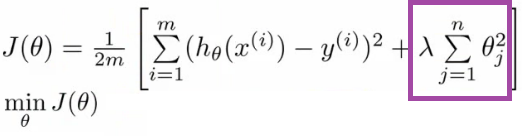

as the complexity is increasing, regularization will add the penalty for higher terms. This will decrease the importance given to higher terms and will bring the model towards less complex equation.

#### L1 regularization : LASSO regression

The key difference between these two is the penalty term.





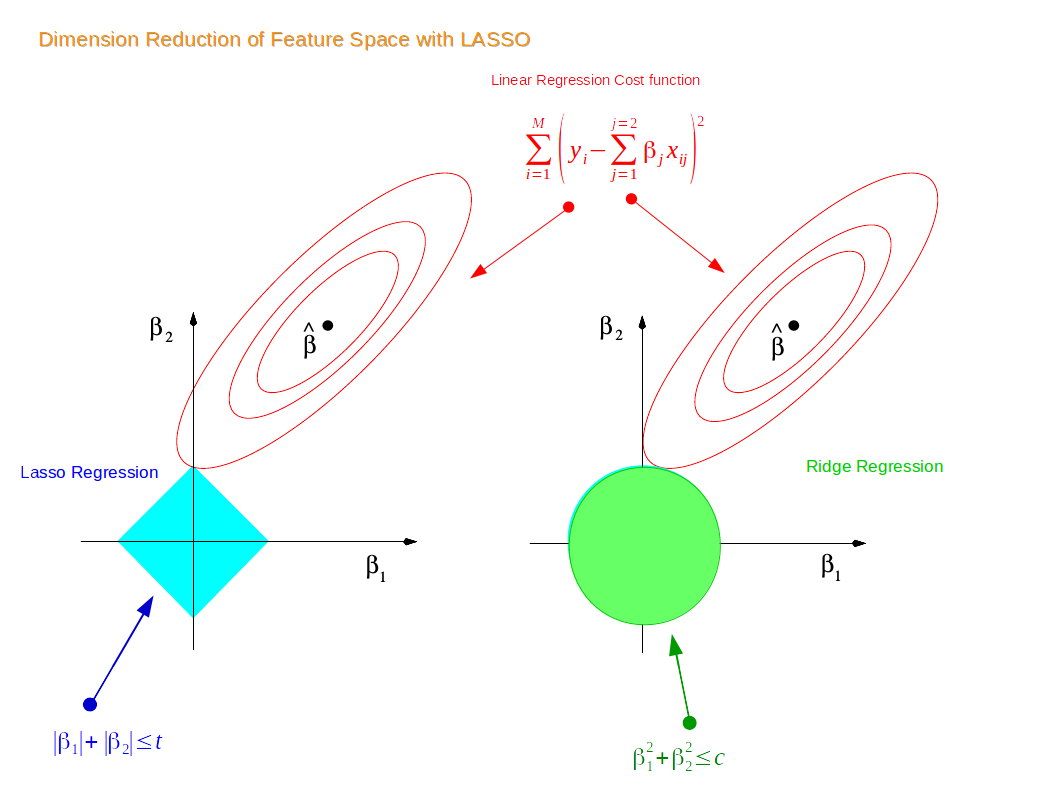

#### **Logistic Regression**

Binary classifier 

Logistic function: Sigmoid 

1) compute probabilities

$\sigma(z) = \frac{1}{1-e^(-z)}$

2) predict classes based on probability and tresholds 


#### K-Means

K-means clustering is a simple and elegant approach for partitioning a
data set into K distinct, non-overlapping clusters. To perform K-means
clustering, we must first specify the desired number of clusters K; then the
K-means algorithm will assign each observation to exactly one of the K
clusters 

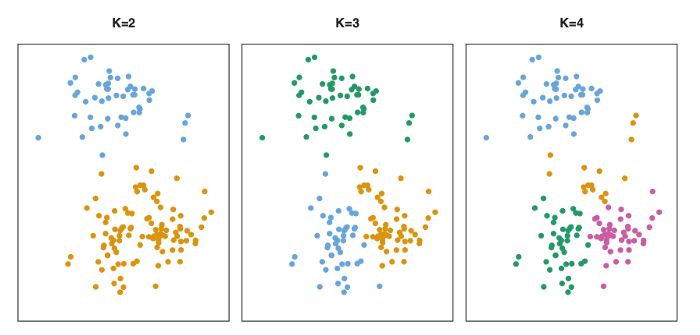

The K-means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. The K-means algorithm aims to choose centroid that minimise the inertia, or within-cluster sum-of-squares criterion [2]:

$\Sigma_{i=0}^n min(||X_i - \mu_j||)^2  $


1) Determine the value “K”, the value “K” represents the number of clusters.

2)  Randomly select 3 distinct centroid (new data points as cluster initialization)

3) Measure the distance (euclidean distance) between each point and the centroid

4) Assign the each point to the nearest cluster

5) Calculate the mean of each custer as new centroid 

6) Repeat step 3–5 with the new center of cluster (repeat until convergence(no further changes) or max number of iterrations

7) Calculate the variance of each cluster

Repeat step 2–7 until get the lowest sum of variance!

In [ ]:
def main(data,k)

  centroids = initialize centroids(data,k)

  while True:
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = update_centroids(data, k , centroids)

    if should_stop(old_centroids, centroids)
      break
  
  return labels

# ==========================================================

def get_labels(data,centroids):

  return 

# ==========================================================

def update_centroids(data, k, centroids):

  return

# ==========================================================

def should_stop(old_centroids, centroids):

  return
  